# 决策树
## 思维导图
![决策树思维导图](./思维导图/决策树.png)

## 尝试构建决策树模型（使用鸢尾花数据集）

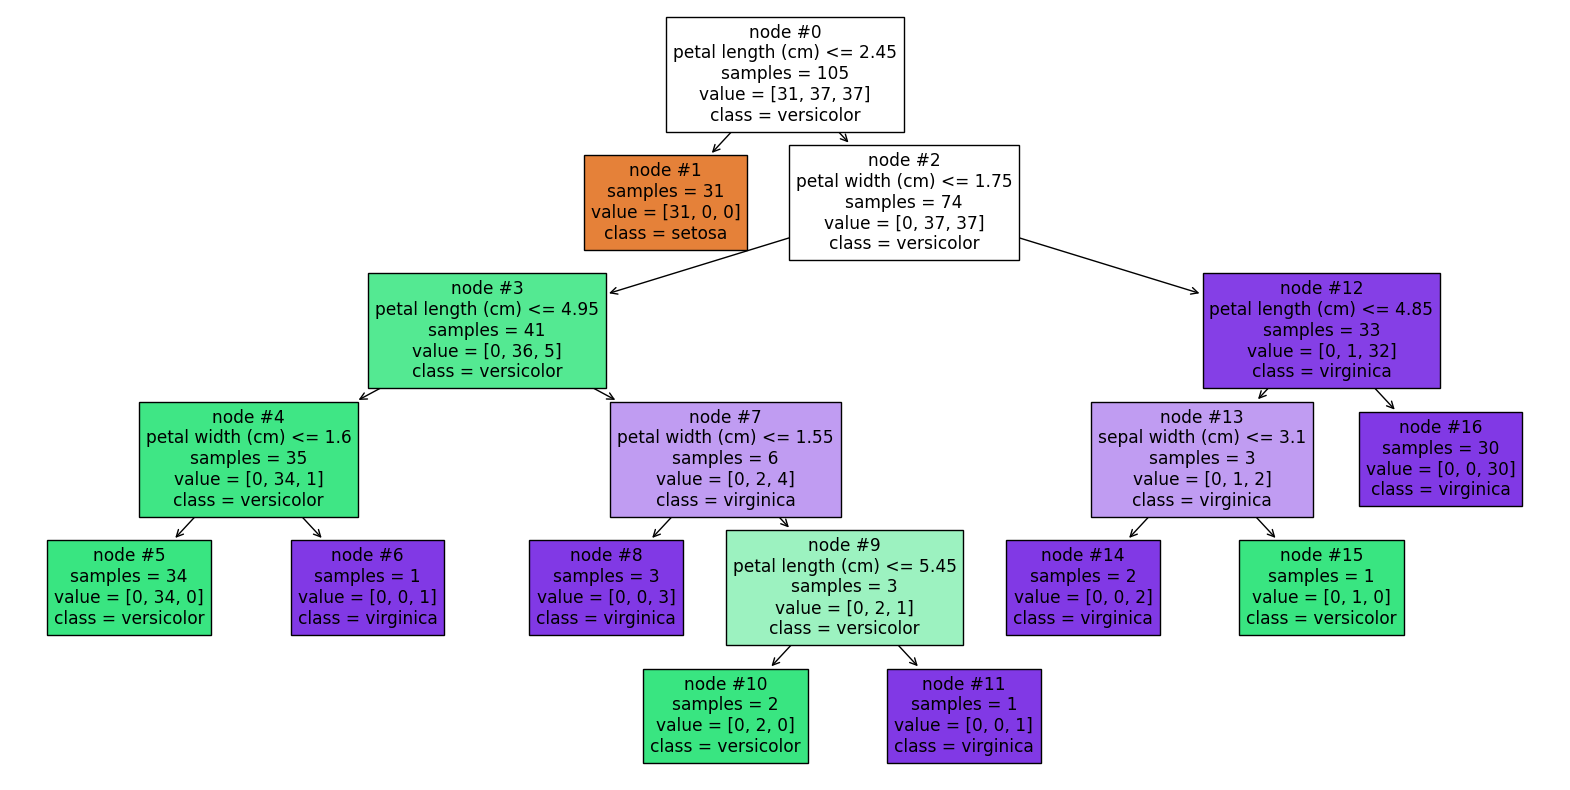

测试集准确率: 1.00


In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 加载数据集
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(criterion='entropy') 
model.fit(X_train, y_train)

model.predict_proba(X)

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names, node_ids=True, impurity=False)
plt.show()

accuracy = model.score(X_test, y_test)
print(f"测试集准确率: {accuracy:.2f}")

# graphviz可视化

In [15]:
from graphviz import Source

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=data.feature_names,  
                           class_names=data.target_names,
                           filled=True, rounded=True,  
                           special_characters=True)

graph = Source(dot_data)
graph.render('iris_decision_tree', view=True) 

'iris_decision_tree.pdf'

## 构建一个完整的决策树模型（包括特征工程）

In [11]:
from visualML4learning import *
import pandas as pd
data = pd.read_csv('data/crx.data', header=None)
Data = FeatureEngineering(data)

In [6]:
display(Data.head(5))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [7]:
display(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


None

In [8]:
display(Data.count_null())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

测试集准确率: 0.81


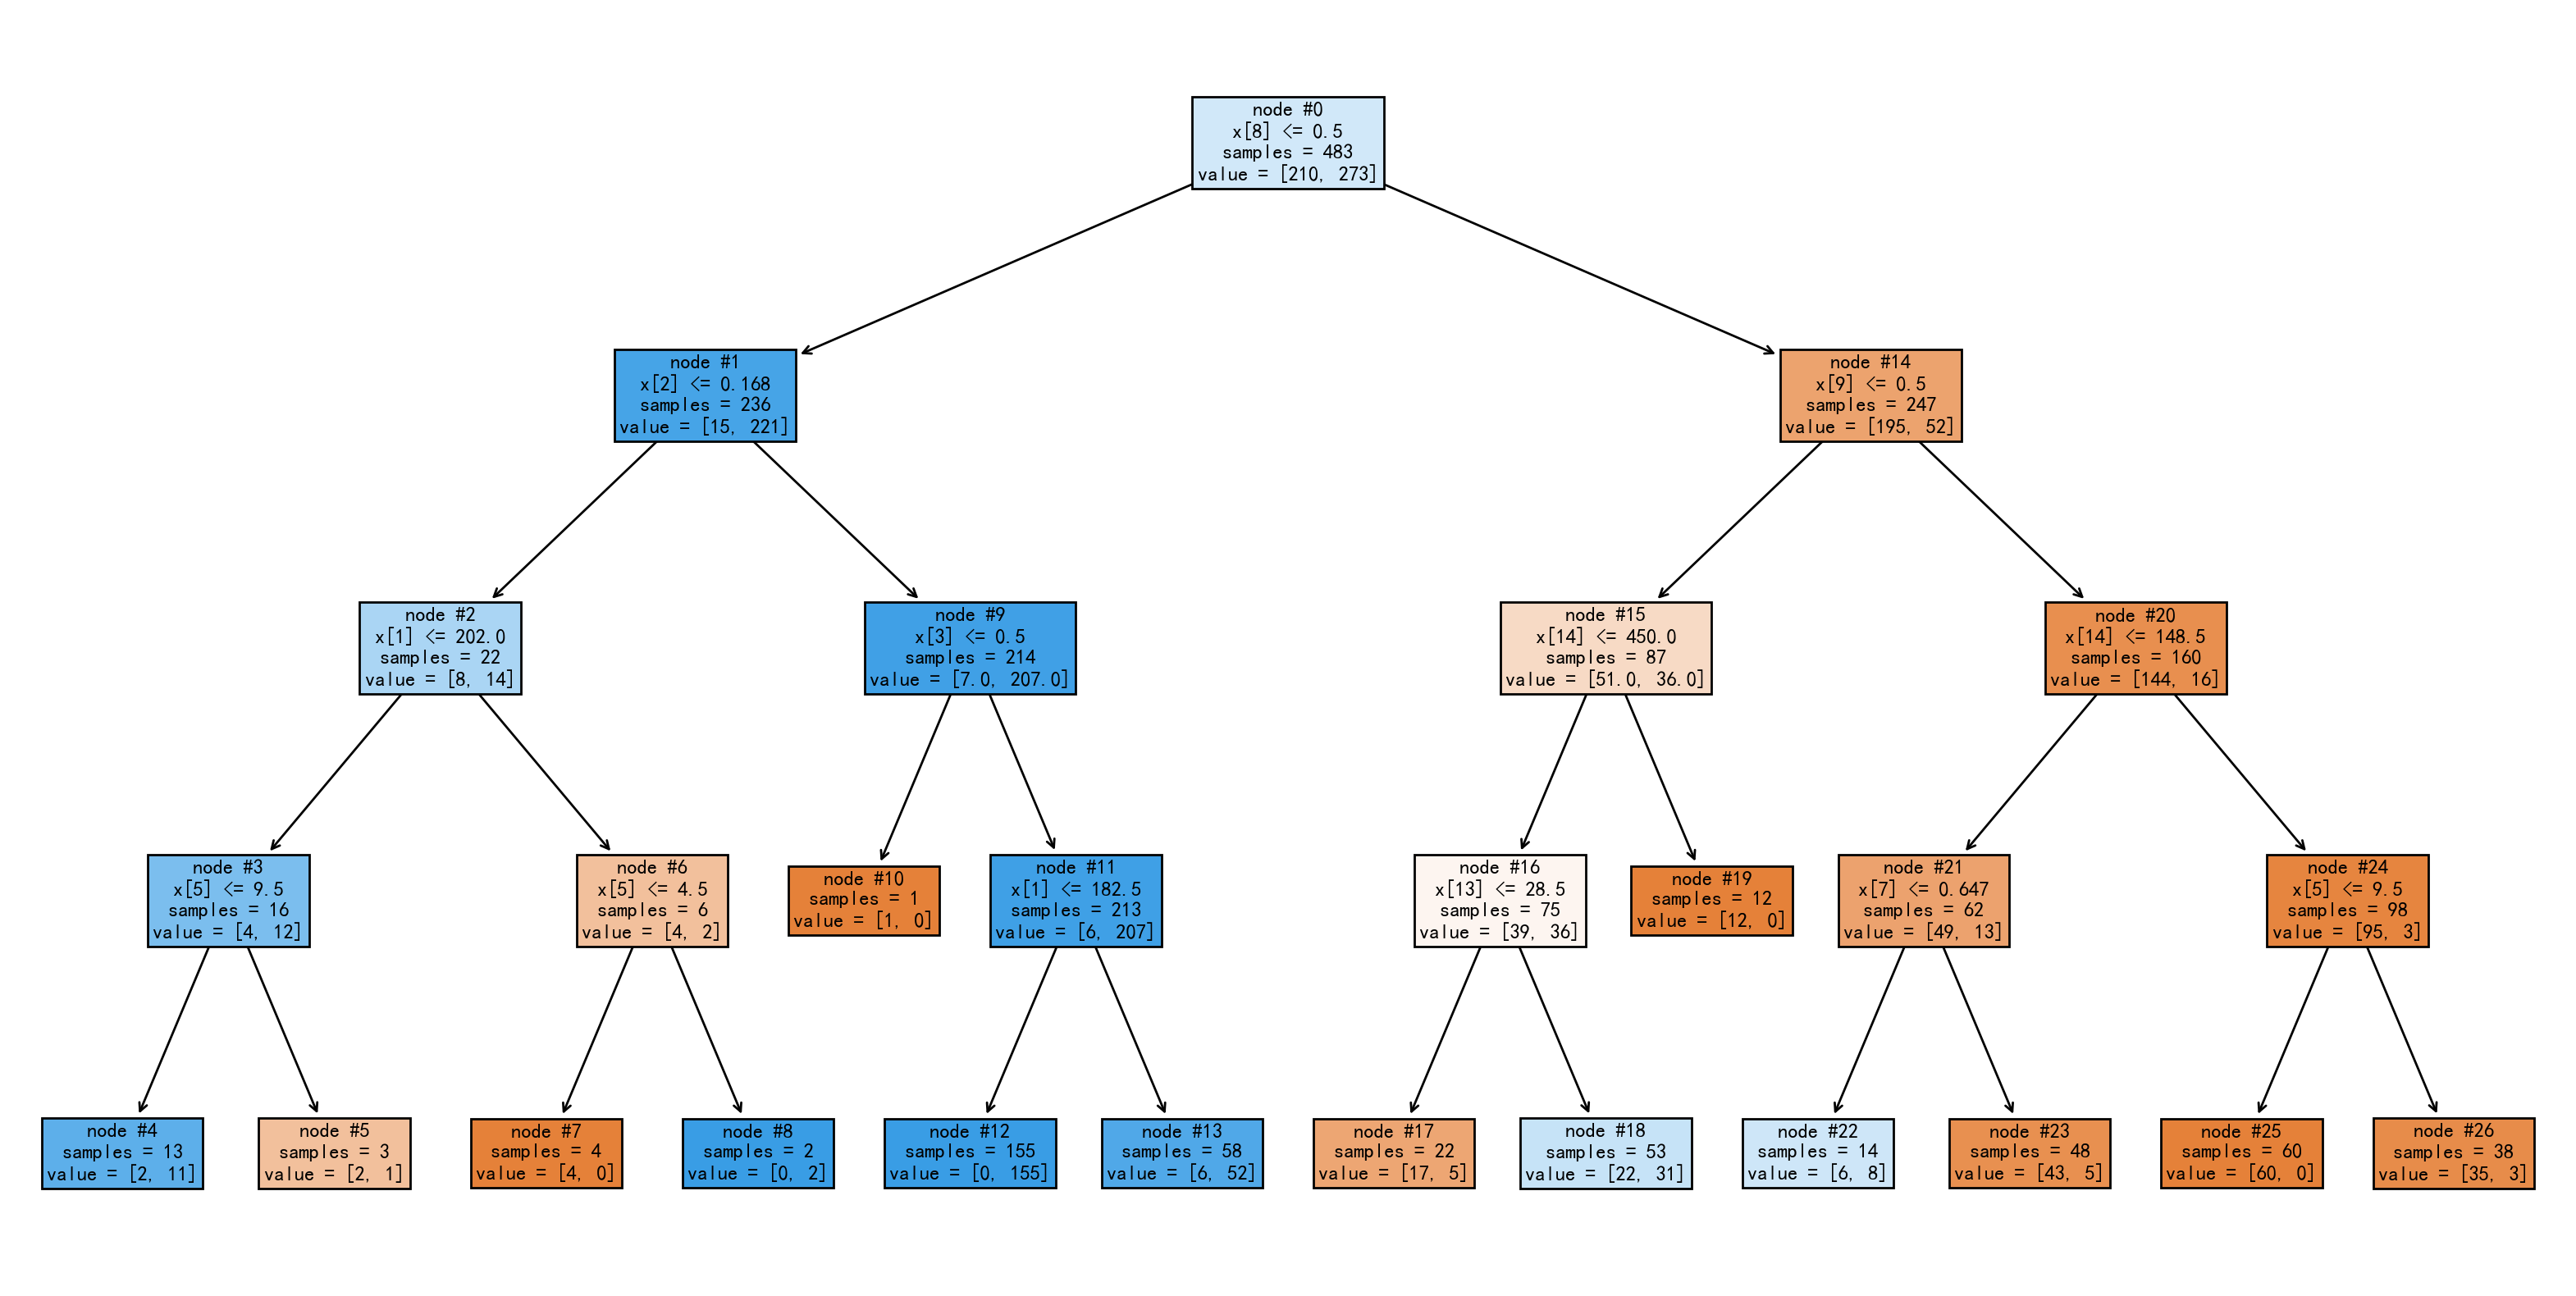

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data.replace('?', pd.NA, inplace=True)  

for column in data.columns:
    if data[column].dtype == 'object': 
        data[column] = data[column].fillna(data[column].mode()[0])
    else:  
        data[column] = data[column].fillna(data[column].median())

label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
        
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42,
                                       max_depth=4)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"测试集准确率: {accuracy:.2f}")

plt.figure(figsize=(20,10), dpi=200)
plot_tree(decision_tree, filled=True, node_ids=True, impurity=False)
plt.show()